In [96]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from numba import jit
import scipy
import math 
import matplotlib.pyplot as plt 
import numpy as np
from numpy import exp, log, sqrt
from scipy.special import expit
from scipy.optimize import minimize
from scipy.optimize import fsolve, root, brenth
from scipy import integrate 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import minimize
from scipy.optimize import newton_krylov, anderson,broyden1
import numpy.polynomial.polynomial as poly
# from scipy.integrate import quad
# --- global constant
Num_of_neuron = 12
#------
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [97]:
def p_x(x):
    '''
    currently x is a float number. Can be changed later.
    '''
    mean_value = 0
    standard_dev = 1
    prob = np.exp(-(x - mean_value)**2 / (2 * standard_dev**2)) / np.sqrt(2 * np.pi * standard_dev**2)
    return prob

In [98]:
def J_x(x, mu, nu):
    '''
    x is scalar, mu and nu are NumPy arraries
    '''
    temp_Jx = 0.00000000001
    for i in range(0, Num_of_neuron):
        if (x - mu[i])/nu[i] <50: 
            temp_Jx = temp_Jx + exp( (x - mu[i])/nu[i] ) / ( nu[i]*(1+exp( (x - mu[i])/nu[i] )) )**2
    return temp_Jx

In [99]:
def F_fun(mu, nu):
    def integrate_fun(x, mu, nu):
#         print('J(x):', J_x(x, mu, nu))
#         print('p(x):', p_x(x) * log(J_x(x, mu, nu)+0.0000001))
        return p_x(x) * log(J_x(x, mu, nu)+0.0000001)
    ans, err = integrate.quad(integrate_fun, -7, 7, args = (mu, nu))
    return -ans

In [100]:
def Objective_fun(lambda_list, alpha):
    mu_list = exp(lambda_list)
    nu = alpha * abs(mu_list) + np.ones(Num_of_neuron) * 0.000001
    F_value = F_fun(mu_list, nu)
    return F_value

In [101]:
def firing_rate(mu, alpha):
    def inte_fun(x, mu, alpha):
#         print((x - mu)/(alpha*mu + 0.00001))
        if (x - mu)/(alpha*mu + 0.00001) < -50:
            return 0
        else:
#             print(-(x-mu)/(alpha*mu+0.00001))
#             print('fenmu:',(alpha*mu+0.00001))
            return p_x(x)/(1 + exp(-(x-mu)/(alpha*mu+0.00001)))
    firing, err = integrate.quad(inte_fun, -7, 7, args = (mu, alpha))
    return firing

In [104]:
def total_firing_rate(lambda_list, alpha):
#     print(lambda_list)
    mu_list = exp(lambda_list)
    total_rate = 0
    for i in range(0, Num_of_neuron):
        total_rate += firing_rate(mu_list[i], alpha)
    return total_rate

In [122]:
L1 = 0.01
L2 = 0.01
alpha = 0.1
my_cost = lambda lambda_list: Objective_fun(lambda_list, alpha) + L1 *(total_firing_rate(lambda_list, alpha)-0) \
+ L2 * (sum(1.0/lambda_list)-0)
x0 = np.random.random(Num_of_neuron)
res = minimize(my_cost, x0, method = 'SLSQP', options={'disp': True})


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.88077389289
            Iterations: 39
            Function evaluations: 563
            Gradient evaluations: 39


In [123]:
res

     fun: 2.8807738928884845
     jac: array([ -2.68936157e-04,  -1.71780586e-04,   1.12175941e-04,
        -1.25408173e-04,  -8.64267349e-06,  -2.79933214e-04,
         1.31934881e-04,  -2.30342150e-04,  -1.38878822e-04,
        -5.76674938e-04,  -2.53975391e-04,   1.02430582e-04,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 563
     nit: 39
    njev: 39
  status: 0
 success: True
       x: array([ 1.74452652, -1.09493708,  0.18182086,  1.74745712,  1.74983478,
        0.18135627,  1.75268836,  1.74531372,  0.61001127,  0.18101093,
        0.90707043,  0.54271902])

In [124]:
total_firing_rate(res.x, alpha)

0.834965474014419

In [125]:
sum(exp(-res.x))

7.8901698567702985

In [126]:
exp(res.x)

array([ 5.72319101,  0.33456066,  1.19939932,  5.73998803,  5.75365197,
        1.19884222,  5.77009391,  5.72769809,  1.84045214,  1.19842828,
        2.47705518,  1.72067906])

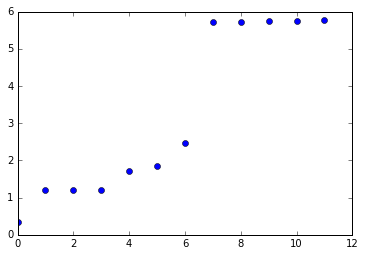

In [127]:
plt.plot(sorted(exp(res.x)),'o')

In [149]:
def test_zero(x,alpha, C1, C2):
    results = np.zeros(2)
    results[0] = firing_rate(exp(x[0]), alpha) + firing_rate(exp(x[1]), alpha) - C1
    results[1] = sum(exp(-x)) - C2
    return results

In [227]:
res = root(test_zero, np.array([-2,0]), args = (0.8,20,1), method = 'excitingmixing')

/Users/hongyehu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/Users/hongyehu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars
/Users/hongyehu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


In [228]:
res

     fun: array([ -1.92772999e+01,   8.38697551e+04])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 300
  status: 2
 success: False
       x: array([ -11.33703226,  407.4205634 ])

In [163]:
exp(res.x)

array([ 0.66805041,  0.09934151])

In [171]:
a = np.array([0.3, 0.5])
print(firing_rate(0.3, 1)+firing_rate(0.5, 1))

0.747679200526


In [214]:
log(0.3)

-1.2039728043259361

In [141]:
exp(res)

array([ 0.4000486 ,  0.10000279])

In [406]:
C1 = 0.84
C2 = 10
alpha = 1.3
test_lambda_1 = np.linspace(-10, 10, num = 100)
test_lambda_2 = np.linspace(-10, 10, num = 100)
[grid_lambda_1, grid_lambda_2] = np.meshgrid(test_lambda_1, test_lambda_2)
z = np.zeros((100, 100))
z2 = np.zeros((100, 100))
for i in range(0, 100):
    for j in range(0, 100):
#         print(exp(grid_lambda_1[i, j]))
        z[i,j] = firing_rate(exp(grid_lambda_1[i, j]), alpha) + firing_rate(exp(grid_lambda_2[i, j]), alpha) - C1
        z2[i, j] = 1.0/exp(grid_lambda_1[i, j]) + 1.0/exp(grid_lambda_2[i, j]) - C2

<a list of 3 text.Text objects>

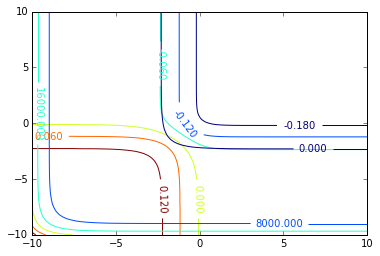

In [412]:
plt.figure()
levels = np.arange(0,0.88,0.1)
CS = plt.contour(grid_lambda_1, grid_lambda_2, z)
CS2 = plt.contour(grid_lambda_1, grid_lambda_2, z2)
plt.clabel(CS, inline=1, fontsize=10)
plt.clabel(CS2, inline=1, fontsize=10)

In [409]:
z[0,:]

array([ 0.16      ,  0.16      ,  0.16      ,  0.16      ,  0.16      ,
        0.16      ,  0.16      ,  0.16      ,  0.16      ,  0.16      ,
        0.16      ,  0.16      ,  0.16      ,  0.15962325,  0.15953947,
        0.15943693,  0.15931143,  0.15943833,  0.15931259,  0.1591587 ,
        0.15897037,  0.15873987,  0.15845779,  0.15811257,  0.1576901 ,
        0.15717312,  0.15654051,  0.1557665 ,  0.15481959,  0.1536614 ,
        0.15224523,  0.1505144 ,  0.14840043,  0.14582112,  0.14267878,
        0.138859  ,  0.13423095,  0.12865035,  0.12196748,  0.11404281,
        0.10477329,  0.09413019,  0.08220488,  0.0692506 ,  0.05569973,
        0.04213488,  0.02920507,  0.01750443,  0.00745639, -0.000751  ,
       -0.00715776, -0.01196827, -0.01546773, -0.01795164, -0.01968266,
       -0.02087308, -0.02168409, -0.02223303, -0.02260293, -0.02285144,
       -0.02301804, -0.02312959, -0.02320421, -0.02325409, -0.02328742,
       -0.02330968, -0.02332456, -0.02333449, -0.02334113, -0.02

In [369]:
ts_res = brenth(lambda x: firing_rate(x, 1.5)-0.35 , 0.000001, 30)

In [370]:
ts_res

1.1439003099552814

In [318]:
firing_rate(ts_res, 1)

0.27999999999999997

In [335]:
alpha = 1.5
x = np.linspace(0.0001, 100, num = 1000)
y = np.zeros(1000)
for i in range(0, 1000):
    y[i] = firing_rate(x[i], alpha)

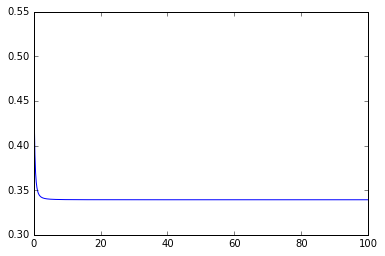

In [336]:
plt.plot(x, y)

In [339]:
min(y)*12

4.0709429125180847

In [340]:
max(y)*12

6.0000000000000018

In [399]:
exp(-3)

0.049787068367863944

In [128]:
exp(3700)

/Users/hongyehu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


inf